# Overview
Fashion-MNIST is a dataset of Zalando's article images, composed of 60,000 training examples and 10,000 test examples. Each example consists of a 28x28 grayscale image accompanied by a label from 10 classes. Fashion-MNIST can be used to benchmark machine learning algorithms as a direct replacement for the original MNIST dataset. It has the same image size and split structure for training and testing.

The following shows an example of how the data looks (each class has three rows):
<img src="https://www.christianhaller.me/assets/img/research/FashionMNIST/fashion30x30random.jpg" alt="Fashion MNIST sprite"  width="800">

Each image is a NumPy array of 28x28 elements; pixels range from 0 to 255. The labels consist of an array of integers, ranging from 0 to 9. Each of these corresponds to a specific class of clothing in the image:

0 - T-shirt/top, 1 - Trouser, 2 - Pullover, 3 - Dress, 4 - Coat, 5 - Sandal, 6 - Shirt, 7 - Sneaker, 8 - Bag, 9 - Ankle boot

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Import the Fashion MNIST dataset
Requesting the files from GitHub account

In [2]:
#!wget "https://raw.githubusercontent.com/sumitraju/data-science/main/neural_network_fashion_mnist/data/t10k-images-idx3-ubyte" -P "/content/Fashion-MNIST"
#!wget "https://raw.githubusercontent.com/sumitraju/data-science/main/neural_network_fashion_mnist/data/t10k-labels-idx1-ubyte" -P "/content/Fashion-MNIST"
#!wget "https://raw.githubusercontent.com/sumitraju/data-science/main/neural_network_fashion_mnist/data/train-images-idx3-ubyte" -P "/content/Fashion-MNIST"
#!wget "https://raw.githubusercontent.com/sumitraju/data-science/main/neural_network_fashion_mnist/data/train-labels-idx1-ubyte" -P "/content/Fashion-MNIST"

If Wget is not installed on windows, install the library using pip and the below code will work

In [3]:
import wget
import os

In [4]:
if os.path.exists("content/Fashion-MNIST/") != True: 
    os.makedirs('content/Fashion-MNIST/')
    wget.download("https://raw.githubusercontent.com/sumitraju/data-science/main/neural_network_fashion_mnist/data/t10k-images-idx3-ubyte", out="content/Fashion-MNIST")
    wget.download("https://raw.githubusercontent.com/sumitraju/data-science/main/neural_network_fashion_mnist/data/t10k-labels-idx1-ubyte", out="content/Fashion-MNIST")
    wget.download("https://raw.githubusercontent.com/sumitraju/data-science/main/neural_network_fashion_mnist/data/train-images-idx3-ubyte", out="content/Fashion-MNIST")
    wget.download("https://raw.githubusercontent.com/sumitraju/data-science/main/neural_network_fashion_mnist/data/train-labels-idx1-ubyte", out="content/Fashion-MNIST")


#filename = wget.download("https://raw.githubusercontent.com/sumitraju/data-science/main/neural_network_fashion_mnist/data/t10k-images-idx3-ubyte")

###Convert the Fashion MNIST files to numpy array

In [5]:
with open("content/Fashion-MNIST/train-labels-idx1-ubyte",'rb') as lbpath_train:
  train_labels = np.frombuffer(lbpath_train.read(), dtype=np.uint8,
                               offset=8)
    
with open("content/Fashion-MNIST/train-images-idx3-ubyte",'rb') as imgpath_train:
  train_images = np.frombuffer(imgpath_train.read(), dtype=np.uint8,
                               offset=16).reshape(len(train_labels), 28,28)

with open("content/Fashion-MNIST/t10k-labels-idx1-ubyte",'rb') as lbpath_test:
  test_labels = np.frombuffer(lbpath_test.read(), dtype=np.uint8,
                               offset=8)
    
with open("content/Fashion-MNIST/t10k-images-idx3-ubyte",'rb') as imgpath_test:
  test_images = np.frombuffer(imgpath_test.read(), dtype=np.uint8,
                               offset=16).reshape(len(test_labels), 28,28)


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's examine the dataset format before training the model. A training set consists of 60,000 images each having a 28 x 28 pixel dimension:

In [7]:
train_images.shape

(60000, 28, 28)

On the other hand, the training set consists of 60,000 labels:

In [8]:
len(train_labels)

60000

Labels are integers between 0 and 9:

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

A total of 10,000 images are included in the test set. Each image has a size of 28 x 28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

The test set contains 10,000 images with labels:

In [11]:
len(test_labels)

10000

## Preprocess the data

You need to preprocess the data before you train the network. If you inspect any image, you will see that the pixels are between 0 and 255:

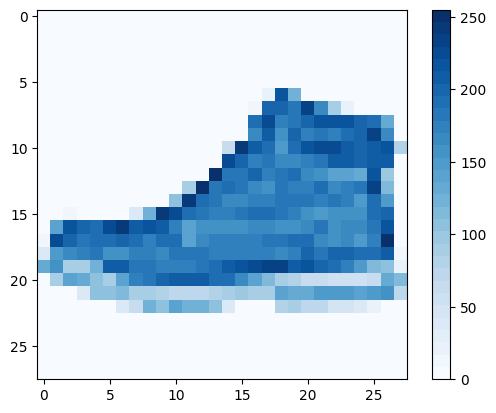

In [12]:
plt.figure()
plt.imshow(train_images[89], cmap=plt.cm.get_cmap('Blues', 30))
plt.colorbar()
plt.grid(False)
plt.show()

The values must be scaled from 0 to 1 before being fed into the neural network model. To do so, divide the values by 255. It is critical that the *training set* and the *testing set* be treated the same:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Here are the first 49 images from the training set displayed with the class name below each image, to verify that the data is in the right format and that you are ready to build the network and train it.

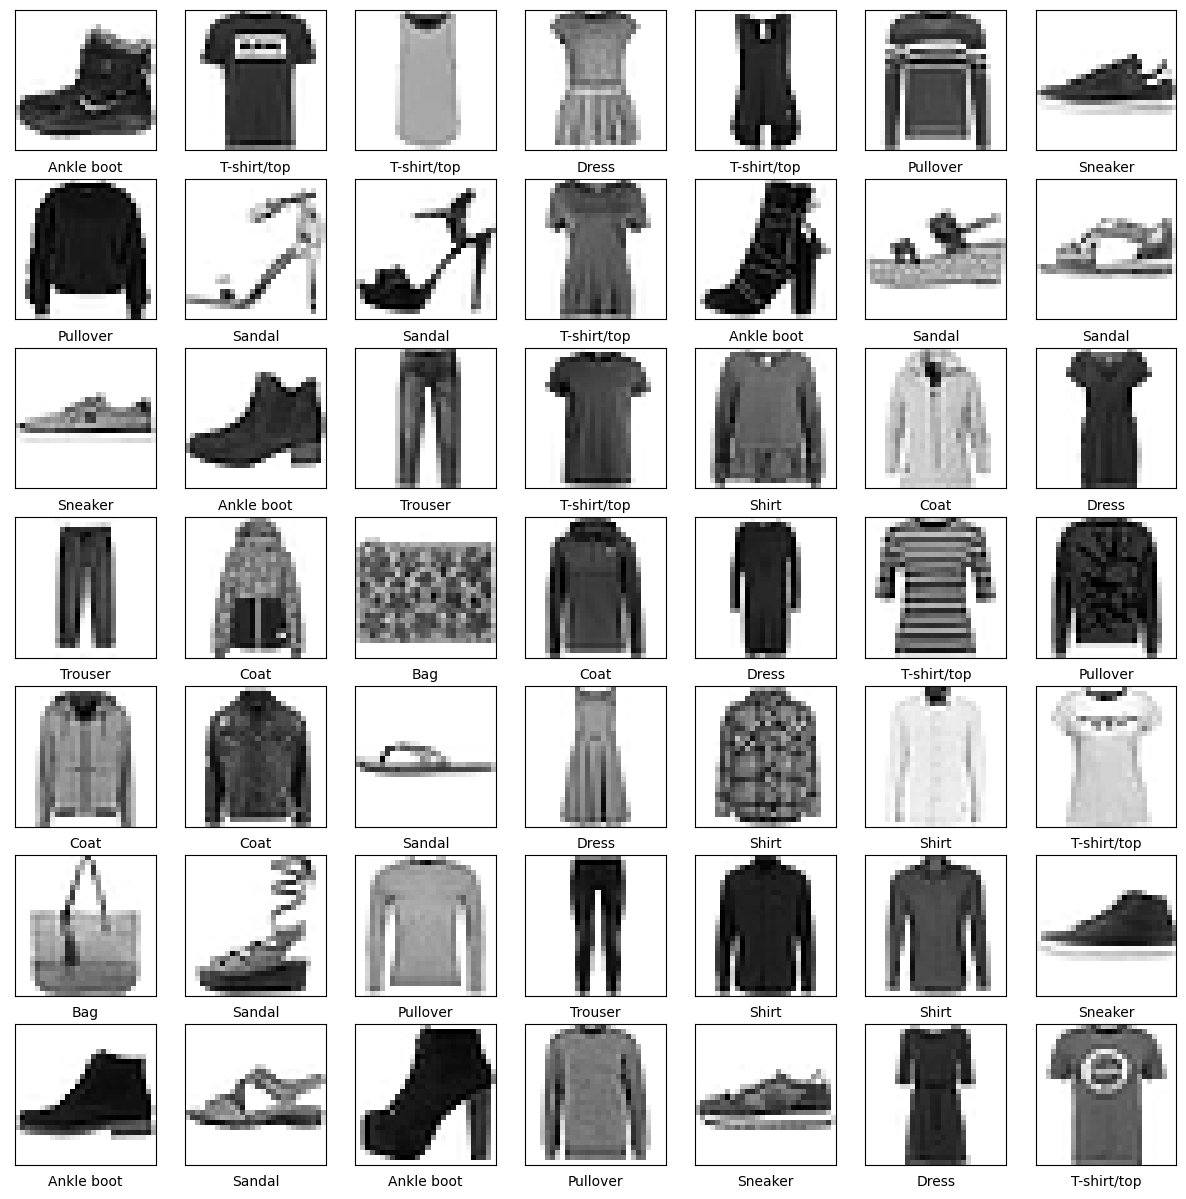

In [14]:
plt.figure(figsize=(15,15))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In order to construct a neural network, layers need to be configured and the model compiled.

### Set up the layers

The layer is the basic building block of a neural network. It extracts representations based on input data. Ideally, these representations are relevant to the problem.

Usually, deep learning is composed of chains of simple layers. All layers have parameters that are learned during training, like *tf.keras.layers.Dense*.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In this network, the first layer is called tf.keras.layers.Flatten, which converts the images from a two-dimensional array to a one-dimensional array (28 * 28 = 784 pixels). You can think of this layer as unstacked pixels in the image that are lined up to the best suit. This layer has no parameters to learn; only the data has to be reformatted.

Following the flattening of the pixels, the network is composed of two `tf.keras.layers.Dense` layers. These are densely/fully connected neural layers. The first dense layer consists of 128 nodes (or neurons). The second (and last) dense layer consists of 10 logits arrays, each containing a score indicating that the image belongs to one of 10 categories.

### Compile the model

A few more settings need to be added to the model before it can be trained. These are added during the model's compilation step:

* Loss function: As the model is trained, this function determines how accurate the model is. You want it as low as possible to steer the model correctly.
* Optimizer: This is how the model updates according to the data it sees and its loss function.
* Metrics: To monitor training and testing, the following example uses *accuracy*, the percentage of correctly classified images.

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###Model Summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


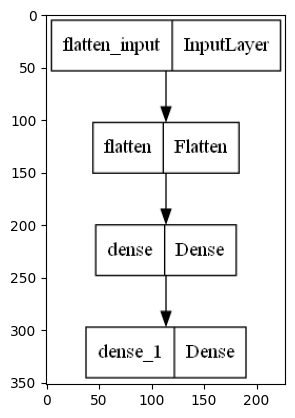

In [17]:
model.summary()

# Plot the model
#from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

# Display the image
modeldata = plt.imread('model.png')
plt.imshow(modeldata)
plt.show()

## Train the model

The following steps are required to train the neural network model:

1. The model is fed the training data by the *train_images* and *train_labels* arrays.
2. The model learns to link images and labels.
3. It makes predictions about a test set -- in this case, the array of *test_images*.
4. Test if the predicted labels match those in the `test_labels` array.


### Feed the model

You can start training with the model.fit method, as it fits the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=11)

In [ ]:
#model.get_weights()

The loss and accuracy metrics are displayed as the model trains. This model achieves an accuracy of about 0.91 (or 91%) on the training data.

###Testing the accuracy with different layers, activation function
The first dense layer consists of 150 nodes and the second dense layer consists of 15 logits arrays. While fitting the model we are using 9 epochs. This time we are using a sigmoid function instead of relu function.


In [ ]:
modelNew = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(150, activation='sigmoid'),
    tf.keras.layers.Dense(15)
])

In [ ]:
modelNew.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
modelNew.fit(train_images, train_labels, epochs=9)

With the change in the nodes and epochs, we got the accuracy of 90% which is little less than our first model. 

###Testing with a batch size
Lets test a model with a batch size given but we keep the same layers and epochs

In [ ]:
modelBatch = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(150, activation='sigmoid'),
    tf.keras.layers.Dense(15)
])

In [ ]:
modelBatch.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
modelBatch.fit(train_images, train_labels, epochs=9, batch_size=10000)

We can see that after adding the batch size of 10000, the model fitting became faster. However, we got the much reduced accuracy. 

### Evaluate accuracy

The next step is to compare how the model performs on the test data:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Interestingly, the accuracy of the test dataset is less than the accuracy of the training dataset. Overfitting is indicated by the gap between training accuracy and test accuracy. Machine learning models overfit when they perform worse on new, previously unknown inputs than on the training data. As a result of overfitting, a model "memorizes" the noise and details in the training dataset to the extent that it negatively affects its performance on new datasets.

### Make predictions

The trained model can be used to predict some images by adding a softmax layer, which converts linear outputs into probabilities that are easier to understand.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Let's have a look at the first prediction the model made for each image in the testing set.:

In [ ]:
predictions[0]

There are 10 numbers in the image prediction. These represent the model's "confidence" that the image corresponds to the 10 types of clothes. You can see which label has the highest confidence:

In [ ]:
np.argmax(predictions[0])

In other words, the model is most confident that this image is a boot, or *class_names[9]*. Examining the test label confirms this classification:

In [ ]:
test_labels[0]

You can graph this to see the complete set of 10 predictions for each class.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

Once the model is trained, it can be used for making predictions about images.

Observe the 0th image, predicted labels, and prediction array. Correct prediction labels are blue, and incorrect prediction labels are red. The number indicates the percentage (out of 100) for the predicted label.

In [ ]:
i = 22
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
i = 652
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Consider plotting several images with their predictions. Be aware that the model can still be wrong even when very confident.

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

To conclude, make a prediction about a single image using the trained model.

In [ ]:
# Grab an image from the test dataset.
img = test_images[356]

print(img.shape)

The *tf.keras* model is optimized for making predictions on a set of examples at once. Due to this, even though you are using one image, you must add it to a collection:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

In [ ]:
plot_image(1, predictions_single[0], test_labels, test_images)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

The tf.keras.Model.predict method returns a list of lists, one for each image in the batch. We'll grab those predictions for our (only) image:

In [ ]:
np.argmax(predictions_single[0])

As expected, the model predicts a label.

##References

https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb

https://github.com/zalandoresearch/fashion-mnist